**Lab – 1 : Basic Programs (Machine Learning)**

Target = Student will Pass (1) or Fail (0)

Features = Hours_Studied, Attendance, Internal_Marks

STEP-1 : Required Packages

In [16]:
# Import Required Libraries
# Pandas is used to handle dataset (CSV, tables)
import pandas as pd
# Numpy is used for numerical operations
import numpy as np
# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt
# Seaborn is used to draw heatmap
import seaborn as sns
# Used to split dataset into training and testing
from sklearn.model_selection import train_test_split
# Used to normalize data (important for KNN)
from sklearn.preprocessing import StandardScaler
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# Metrics for evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

Step-2: Create Dataset and Save as CSV

In [17]:
# Creating a student performance dataset
data = {
    "Hours_Studied": [1,2,3,4,5,6,7,8,9,10, 1,2,3,4,5,6,7,8,9,10],
    "Attendance":   [30,35,40,45,50,60,70,80,90,95, 32,38,42,48,55,65,72,82,88,96],
    "Internal_Marks":[20,25,30,35,45,55,65,75,85,90, 22,28,32,38,48,58,68,78,82,92],
    "Final_Result":[0,0,0,0,0,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save the dataset as CSV file
df.to_csv("students.csv", index=False)

Step-3: Read CSV and Display First 5 Rows

In [18]:
# Read CSV file
df = pd.read_csv("students.csv")
# Display first 5 rows
print(df.head())

   Hours_Studied  Attendance  Internal_Marks  Final_Result
0              1          30              20             0
1              2          35              25             0
2              3          40              30             0
3              4          45              35             0
4              5          50              45             0


Step-4: Find Missing Values

In [19]:
# Check missing values
print(df.isnull())
# Count missing values
print(df.isnull().sum())

    Hours_Studied  Attendance  Internal_Marks  Final_Result
0           False       False           False         False
1           False       False           False         False
2           False       False           False         False
3           False       False           False         False
4           False       False           False         False
5           False       False           False         False
6           False       False           False         False
7           False       False           False         False
8           False       False           False         False
9           False       False           False         False
10          False       False           False         False
11          False       False           False         False
12          False       False           False         False
13          False       False           False         False
14          False       False           False         False
15          False       False           

Step-5: Split Features and Target

In [21]:
# X contains input features
X = df.drop("Final_Result", axis=1)
# y contains output (Pass=1, Fail=0)
y = df["Final_Result"]

Step-6: Normalize Data (Important for KNN)

In [22]:
# Create scaler object
scaler = StandardScaler()
# Fit and transform the feature data
X = scaler.fit_transform(X)

Step-7: Train-Test Split

In [23]:
# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Step-8: Train KNN Model

In [24]:
# Create KNN model with k = 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)
# Train the model using training data
model.fit(X_train, y_train)

KNeighborsClassifier()

Step-9: Prediction

In [25]:
# Predict result for test data
y_pred = model.predict(X_test)
# Print predicted and actual values
print("Predicted:", y_pred)
print("Actual   :", y_test.values)

Predicted: [1 0 1 1 0 1]
Actual   : [1 0 1 1 0 1]


Step-10: Confusion Matrix

In [26]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2 0]
 [0 4]]


Step-11: Precision, Recall, F1-Score

In [27]:
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate f1-score
f1 = f1_score(y_test, y_pred)

# Print values
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Step-12: Visualization

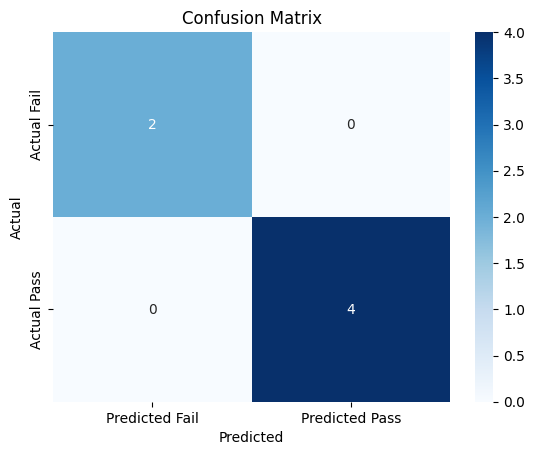

In [28]:
# Draw confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Fail","Predicted Pass"],
            yticklabels=["Actual Fail","Actual Pass"])

# Add labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()